# Name: Carlos Gross-Martinez
# Z Number: 23226341
#https://colab.research.google.com/drive/1bZHHUM1KzN7ObPxrgx0LqiYWqVE2Hkb-?usp=sharing
#Perceptron Learning

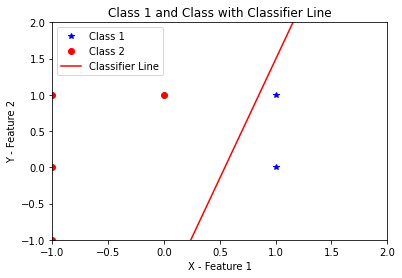


The predicted values based on the specified test set can be seen below:
[[1.]
 [1.]
 [0.]
 [0.]]

Model classification Results Vs True Classification 
True: Correctly Classified. False: Incorrectly Classified
[[ True]
 [False]
 [False]
 [ True]]


In [ ]:
#function import from libraries
import numpy as np
import matplotlib.pyplot as plt

#declaration neural wetwork class with 6 functions
class neural_network(object):

  #Construct function call and initialization of two variables
  def __init__(self, num_parameters = 2):

    #ensures same weights are generated in every run using seeding
    np.random.seed(1)

    #generates random weights between -1 and 1 to the class' 3x1 weight matrix
    self.weight_matrix = (2 * np.random.random((3,1))) - 1


    #initializing the learning rate variable of the class to 1
    self.learning_rate = 1

  #hard limiter function
  def hard_limiter(self, x):

    #create a numpy array of of zeros with size of array x
    result = np.zeros(x.shape)

    #logical comparison to threshold results in x for output Y
    result[x >= 0] = 1
    return result

  #forward propagation function
  def forward_propagation(self, inputs):

    #creates variable result with the dot prodruc of weights and inputs
    result = np.dot(inputs, self.weight_matrix)

    #returns the new value of result based on comparisons of activation function
    return self.hard_limiter(result)

  #ploting function
  def plot(features, labels, thre_parm, classes):
    plt.figure()
    plt.plot(features[labels[:] == classes[0],0], features[labels[:] == classes[0],1], 'r*', features[labels[:] == classes[1],0], features[labels[:] == classes[1],1], 'g^')
    plt.axis([-1,2,-1,2])
    x1 = np.linspace(-1,2,50)
    x2 = -(thre_parm[0] * x1 + thre_parm[2]) / thre_parm[1]
    plt.plot(x1, x2, '-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class' + str(classes[0]), 'Class' + str(classes[1])])
    plt.show()


  #train function
  def train (self, train_inputs, labels, num_train_iterations):

    #outter loop which loops the number of iterations
    for iteration in range(num_train_iterations):

      #inner loop which loops the number of rows in the inputs
      for i in range(train_inputs.shape[0]):

        #initializing variable with the prediction results of samples
        pred_i = self.pred(train_inputs[i,:])

        #if the predicted value is not equal to the actual value
        if pred_i!= labels[i]:

          #initializes variable with the propagation results
          output = self.forward_propagation(train_inputs[i,:])
          #calculates error
          error = labels[i] - output
          #obtaind the new adjusment values for the weight
          adjustment = self.learning_rate * error * train_inputs[i]
          #updates the value of the weight matrix with the new adjusted weights
          self.weight_matrix[:,0] += adjustment

  #prediction function
  def pred(self, inputs):

    #initializes variable to the predictions if the inputs by the model
    preds = self.forward_propagation(inputs)
    return preds

#creates a numpy array for class 1 and class 2
c1 = np.array([[1,1],[1,0]])
c2 = np.array([[0,1],[-1,-1],[-1,0],[-1,1]])

#creates numpy array of features
features = np.array([[1,1],[1,0],[0,1],[-1,-1],[-1,0],[-1,1]])

#creates labels for the features
feature_labels = np.array([[1],[1],[0],[0],[0],[0]])

#creates the classes for classification
classes = [0,1]

#initializes variable to matrix the shape of features with values of 1
bias = np.ones((features.shape[0],1))

#appends the bias to the features variable
features = np.append(features, bias, axis = 1)

#builds nreural network from class and initializes it
neural_network = neural_network()

#training the network
neural_network.train(features, feature_labels, 100)

#plotting of the sample points with classifier
plt.figure
plt.plot(c1[:,0], c1[:,1], 'b*', c2[:,0], c2[:,1],'ro')
plt.axis([-1,2,-1,2])
x1 = np.linspace(-1,2,50)
x2 = -(neural_network.weight_matrix[0] * x1 + neural_network.weight_matrix[2]) / neural_network.weight_matrix[1]
plt.plot(x1, x2, '-r')
plt.xlabel('X - Feature 1')
plt.ylabel('Y - Feature 2')
plt.legend(['Class 1', 'Class 2', 'Classifier Line'])
plt.title('Class 1 and Class 2 with Classifier Line')
plt.show()

#creating numpy array for testing sample points and labels
features_test = np.array([[2,0],[2,1],[0,0],[-2,0]])
feature_labels_test = np.array([[1],[0],[1],[0]])

#appending bias to the fetures_test set
features_test = np.append(features_test, np.ones((features_test.shape[0],1)) , axis = 1)

#print values predicted by the model
print('\nThe predicted values based on the specified test set can be seen below:')
print(neural_network.pred(features_test))

#print classification of model against true label value
print('\nModel classification Results Vs True Classification ')
print('True: Correctly Classified. False: Incorrectly Classified')
print(neural_network.pred(features_test) == feature_labels_test)


#Gradient Descent Learning - Linear Activation
#Learning rate = 1

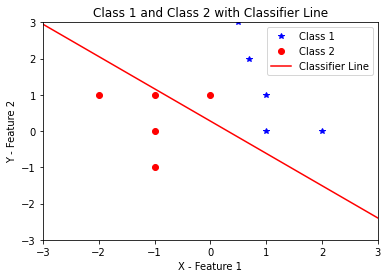

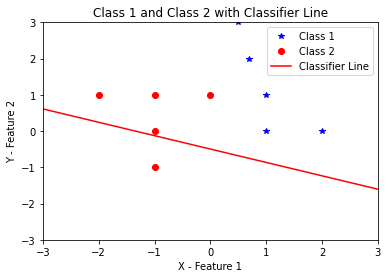

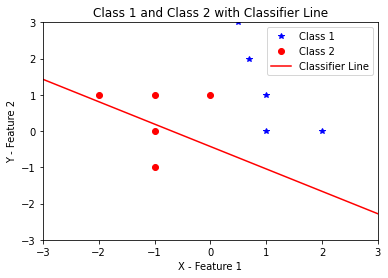

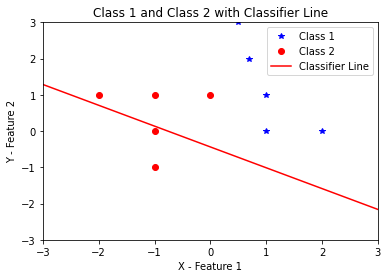

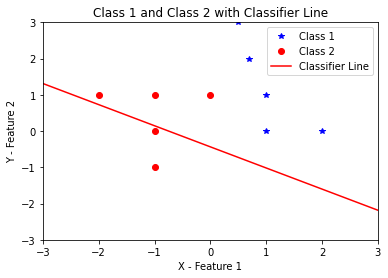

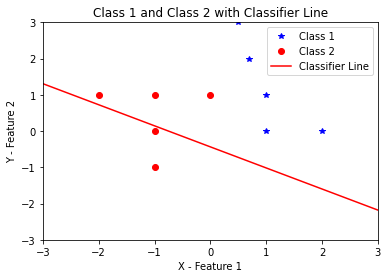

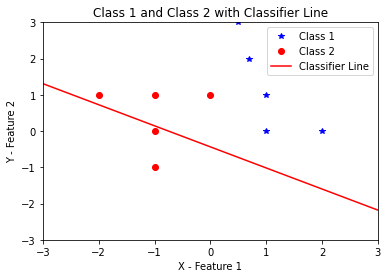

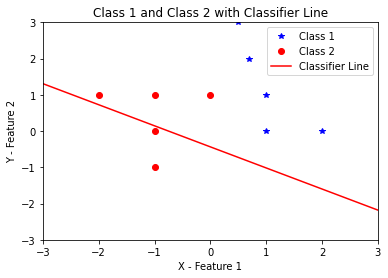

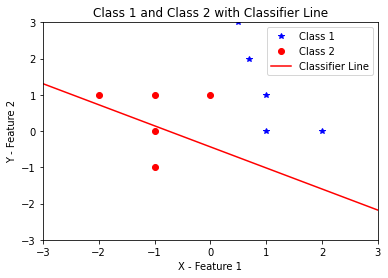

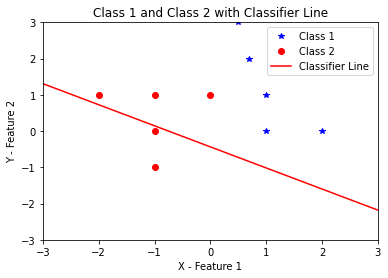

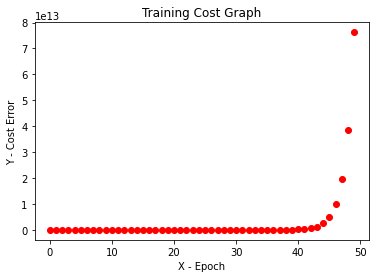

In [ ]:
#function import from libraries
import numpy as np
import matplotlib.pyplot as plt

#declaration neural wetwork class with 4 functions
class neural_network(object):

  def __init__(self, learning_r = 1):
    #ensures same weights are generated in every run usind seeding
    np.random.seed(1)
    #generates random weights between -1 and 1 to the class' 3x1 weight matrix
    self.weight_matrix = 2 * np.random.random((3,1)) - 1
    #initializing the learning rate variable of the class to 1
    self.learning_rate = learning_r

    #initializinf numpy arrays to hold values for weights and cost error
    self.cost_error = np.zeros(([50,1]))
    self.epoch = np.zeros(([50,1]))
    self.w0 = np.zeros(([50,1]))
    self.w1 = np.zeros(([50,1]))
    self.w2 = np.zeros(([50,1]))

  #forward propagation function
  def forward_propagation(self, inputs):
    #creates variable result with the dot prodruc of weights and inputs
    result = np.dot(inputs, self.weight_matrix)
    return result


  def train (self, train_inputs, labels, num_train_iterations):
    #initializes variable to number of samples
    N = train_inputs.shape[0]

    #loop  which iterates as many times as specified
    for iteration in range(num_train_iterations):
      #conducts forwards propagation of sample data
      outputs = self.forward_propagation(train_inputs)
      #calculate the difference error between predicted and actual
      error = labels - outputs
      #calculates necessary adjusments to weights
      adjustment = (self.learning_rate/N) * np.sum(np.multiply(error, train_inputs), axis = 0)
      #updates the weight matrix with the new adjustment
      self.weight_matrix[:,0] += adjustment
      #calculates the error cost of iteration and saves it to variable
      self.cost_error[iteration] = (1/(2*N)) * np.sum(np.multiply(error, error), axis = 0)
      #counts the number of epochs for plotting purposes
      self.epoch[iteration] = iteration
      #identifies the w0 of iteration and saves it to variable
      self.w0[iteration] = self.weight_matrix[0,0]
      #identifies the w1 of iteration and saves it to variable
      self.w1[iteration] = self.weight_matrix[1,0]
      #identifies the w0 of iteration and saves it to variable
      self.w2[iteration] = self.weight_matrix[2,0]
      #condition statement to print current progress of model
      if iteration % 5 == 0:
        plt.figure
        plt.plot(c1[:,0], c1[:,1], 'b*', c2[:,0], c2[:,1],'ro')
        plt.axis([-3,3,-3,3])
        x1 = np.linspace(-3,3,50)
        x2 = -(neural_network.weight_matrix[0] * x1 + neural_network.weight_matrix[2]) / neural_network.weight_matrix[1]
        plt.plot(x1, x2, '-r')
        plt.xlabel('X - Feature 1')
        plt.ylabel('Y - Feature 2')
        plt.legend(['Class 1', 'Class 2', 'Classifier Line'])
        plt.title('Class 1 and Class 2 with Classifier Line')
        plt.show()

  #prediction function
  def pred(self, inputs):
    #initializes variable to the predictions if the inputs by the model
    preds = self.forward_propagation(inputs)
    #updates values of prediction to reflect proper classes
    preds[preds < 0] = -1
    preds[preds > 0] = 1
    return preds

#creates a numpy array for class 1 and class 2
c1 = np.array([[1,1],[1,0],[0.5,3],[0.7,2],[2,0]])
c2 = np.array([[0,1],[-1,-1],[-1,0],[-1,1],[-2,1]])

#creating numpy array for testing sample points and labels
features = np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
feature_labels = np.array([[1],[1],[-1],[-1],[1],[1],[-1],[-1],[1],[-1]])

#definition of available classes
classes = [-1,1]

#initializes variable to matrix the shape of features with values of 1
bias = np.ones((features.shape[0],1))

#appending bias to the fetures_test set
features = np.append(features, bias, axis = 1)

#creating and trainng neuron with gradient descent learning
neural_network = neural_network()
neural_network.train(features, feature_labels, 50)

#plotting the training cost of the graph
plt.figure
plt.plot(neural_network.epoch, neural_network.cost_error, 'ro')
plt.xlabel('X - Epoch')
plt.ylabel('Y - Cost Error')
plt.title('Training Cost Graph')
plt.show()

#Gradient Descent Learning - Linear Activation
#Learning rate = 0.5

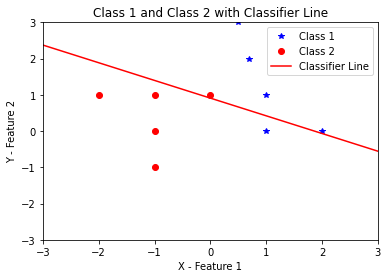

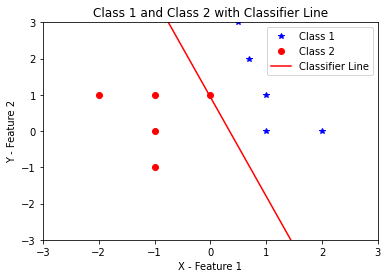

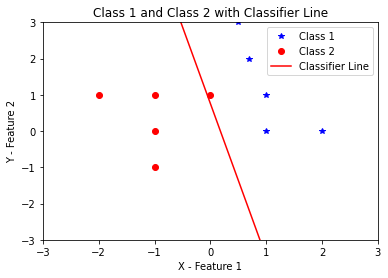

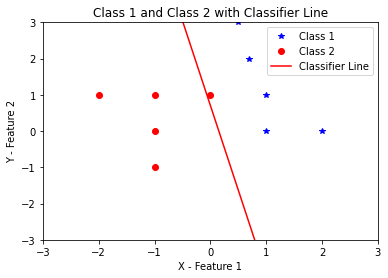

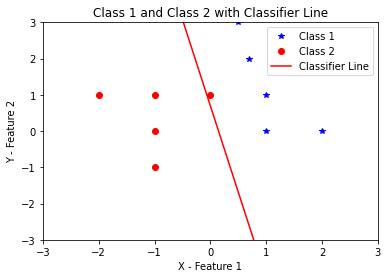

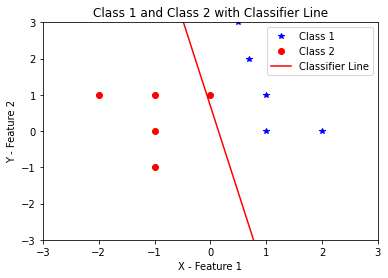

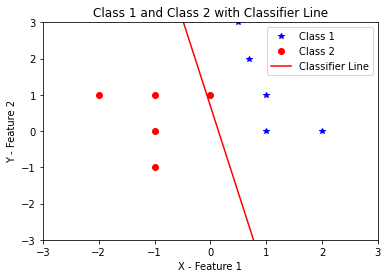

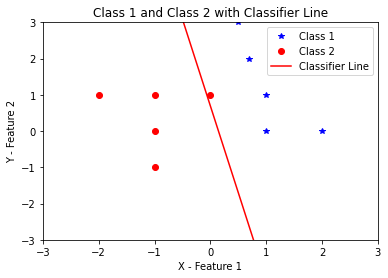

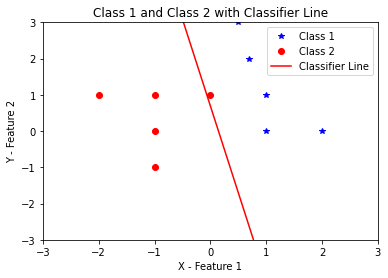

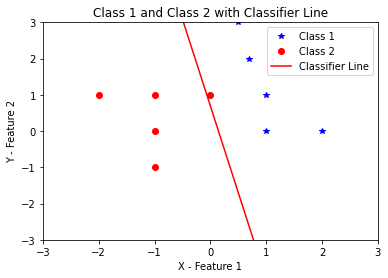

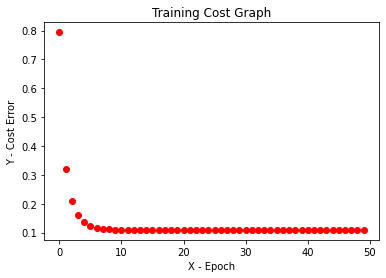

In [ ]:
#function import from libraries
import numpy as np
import matplotlib.pyplot as plt

#declaration neural wetwork class with 4 functions
class neural_network(object):

  def __init__(self, learning_r = 0.5):
    #ensures same weights are generated in every run usind seeding
    np.random.seed(1)
    #generates random weights between -1 and 1 to the class' 3x1 weight matrix
    self.weight_matrix = 2 * np.random.random((3,1)) - 1
    #initializing the learning rate variable of the class to 1
    self.learning_rate = learning_r

    #initializinf numpy arrays to hold values for weights and cost error
    self.cost_error = np.zeros(([50,1]))
    self.epoch = np.zeros(([50,1]))
    self.w0 = np.zeros(([50,1]))
    self.w1 = np.zeros(([50,1]))
    self.w2 = np.zeros(([50,1]))

  #forward propagation function
  def forward_propagation(self, inputs):
    #creates variable result with the dot prodruc of weights and inputs
    result = np.dot(inputs, self.weight_matrix)
    return result


  def train (self, train_inputs, labels, num_train_iterations):
    #initializes variable to number of samples
    N = train_inputs.shape[0]

    #loop  which iterates as many times as specified
    for iteration in range(num_train_iterations):
      #conducts forwards propagation of sample data
      outputs = self.forward_propagation(train_inputs)
      #calculate the difference error between predicted and actual
      error = labels - outputs
      #calculates necessary adjusments to weights
      adjustment = (self.learning_rate/N) * np.sum(np.multiply(error, train_inputs), axis = 0)
      #updates the weight matrix with the new adjustment
      self.weight_matrix[:,0] += adjustment
      #calculates the error cost of iteration and saves it to variable
      self.cost_error[iteration] = (1/(2*N)) * np.sum(np.multiply(error, error), axis = 0)
      #counts the number of epochs for plotting purposes
      self.epoch[iteration] = iteration
      #identifies the w0 of iteration and saves it to variable
      self.w0[iteration] = self.weight_matrix[0,0]
      #identifies the w1 of iteration and saves it to variable
      self.w1[iteration] = self.weight_matrix[1,0]
      #identifies the w0 of iteration and saves it to variable
      self.w2[iteration] = self.weight_matrix[2,0]
      #condition statement to print current progress of model
      if iteration % 5 == 0:
        plt.figure
        plt.plot(c1[:,0], c1[:,1], 'b*', c2[:,0], c2[:,1],'ro')
        plt.axis([-3,3,-3,3])
        x1 = np.linspace(-3,3,50)
        x2 = -(neural_network.weight_matrix[0] * x1 + neural_network.weight_matrix[2]) / neural_network.weight_matrix[1]
        plt.plot(x1, x2, '-r')
        plt.xlabel('X - Feature 1')
        plt.ylabel('Y - Feature 2')
        plt.legend(['Class 1', 'Class 2', 'Classifier Line'])
        plt.title('Class 1 and Class 2 with Classifier Line')
        plt.show()

  #prediction function
  def pred(self, inputs):
    #initializes variable to the predictions if the inputs by the model
    preds = self.forward_propagation(inputs)
    #updates values of prediction to reflect proper classes
    preds[preds < 0] = -1
    preds[preds > 0] = 1
    return preds

#creates a numpy array for class 1 and class 2
c1 = np.array([[1,1],[1,0],[0.5,3],[0.7,2],[2,0]])
c2 = np.array([[0,1],[-1,-1],[-1,0],[-1,1],[-2,1]])

#creating numpy array for testing sample points and labels
features = np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
feature_labels = np.array([[1],[1],[-1],[-1],[1],[1],[-1],[-1],[1],[-1]])

#definition of available classes
classes = [-1,1]

#initializes variable to matrix the shape of features with values of 1
bias = np.ones((features.shape[0],1))

#appending bias to the fetures_test set
features = np.append(features, bias, axis = 1)

#creating and trainng neuron with gradient descent learning
neural_network = neural_network()
neural_network.train(features, feature_labels, 50)

#plotting the training cost of the graph
plt.figure
plt.plot(neural_network.epoch, neural_network.cost_error, 'ro')
plt.xlabel('X - Epoch')
plt.ylabel('Y - Cost Error')
plt.title('Training Cost Graph')
plt.show()

#Gradient Descent Learning - Linear Activation
#Learning rate = 0.05

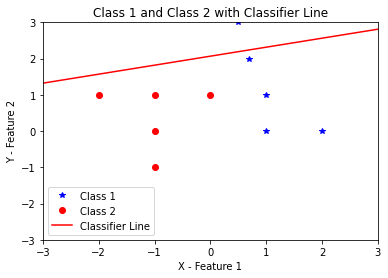

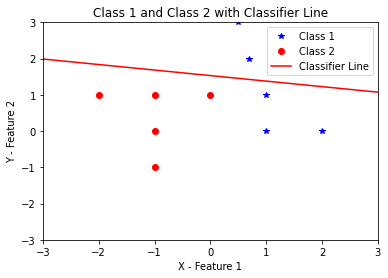

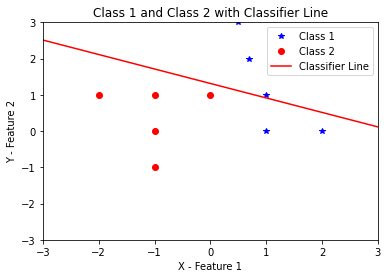

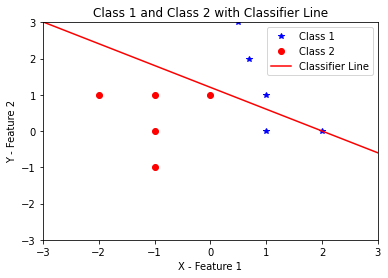

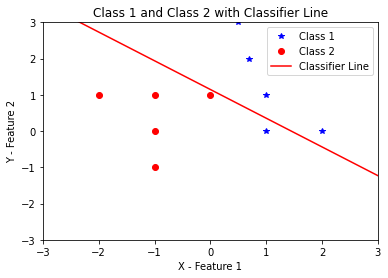

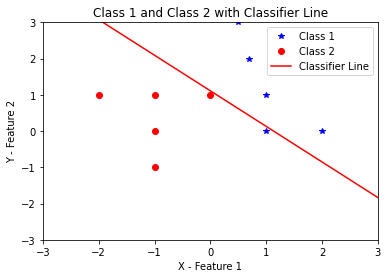

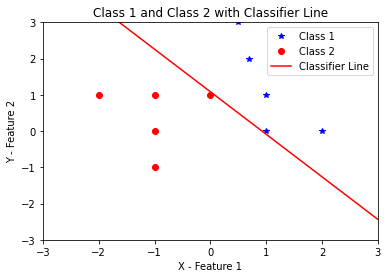

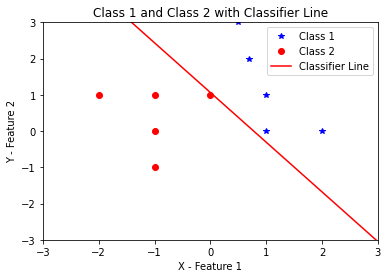

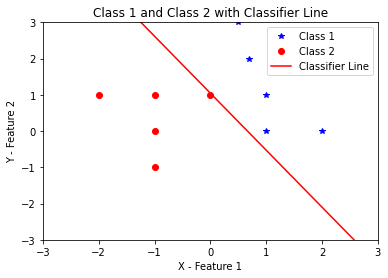

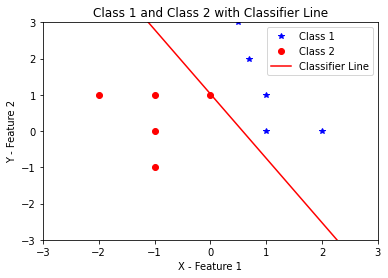

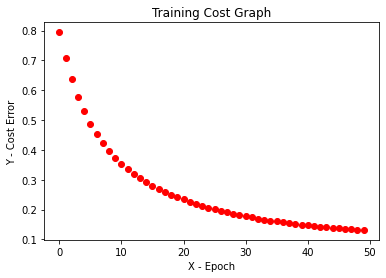

In [ ]:
#function import from libraries
import numpy as np
import matplotlib.pyplot as plt

#declaration neural wetwork class with 4 functions
class neural_network(object):

  def __init__(self, learning_r = 0.05):
    #ensures same weights are generated in every run usind seeding
    np.random.seed(1)
    #generates random weights between -1 and 1 to the class' 3x1 weight matrix
    self.weight_matrix = 2 * np.random.random((3,1)) - 1
    #initializing the learning rate variable of the class to 1
    self.learning_rate = learning_r

    #initializinf numpy arrays to hold values for weights and cost error
    self.cost_error = np.zeros(([50,1]))
    self.epoch = np.zeros(([50,1]))
    self.w0 = np.zeros(([50,1]))
    self.w1 = np.zeros(([50,1]))
    self.w2 = np.zeros(([50,1]))

  #forward propagation function
  def forward_propagation(self, inputs):
    #creates variable result with the dot prodruc of weights and inputs
    result = np.dot(inputs, self.weight_matrix)
    return result


  def train (self, train_inputs, labels, num_train_iterations):
    #initializes variable to number of samples
    N = train_inputs.shape[0]

    #loop  which iterates as many times as specified
    for iteration in range(num_train_iterations):
      #conducts forwards propagation of sample data
      outputs = self.forward_propagation(train_inputs)
      #calculate the difference error between predicted and actual
      error = labels - outputs
      #calculates necessary adjusments to weights
      adjustment = (self.learning_rate/N) * np.sum(np.multiply(error, train_inputs), axis = 0)
      #updates the weight matrix with the new adjustment
      self.weight_matrix[:,0] += adjustment
      #calculates the error cost of iteration and saves it to variable
      self.cost_error[iteration] = (1/(2*N)) * np.sum(np.multiply(error, error), axis = 0)
      #counts the number of epochs for plotting purposes
      self.epoch[iteration] = iteration
      #identifies the w0 of iteration and saves it to variable
      self.w0[iteration] = self.weight_matrix[0,0]
      #identifies the w1 of iteration and saves it to variable
      self.w1[iteration] = self.weight_matrix[1,0]
      #identifies the w0 of iteration and saves it to variable
      self.w2[iteration] = self.weight_matrix[2,0]
      #condition statement to print current progress of model
      if iteration % 5 == 0:
        plt.figure
        plt.plot(c1[:,0], c1[:,1], 'b*', c2[:,0], c2[:,1],'ro')
        plt.axis([-3,3,-3,3])
        x1 = np.linspace(-3,3,50)
        x2 = -(neural_network.weight_matrix[0] * x1 + neural_network.weight_matrix[2]) / neural_network.weight_matrix[1]
        plt.plot(x1, x2, '-r')
        plt.xlabel('X - Feature 1')
        plt.ylabel('Y - Feature 2')
        plt.legend(['Class 1', 'Class 2', 'Classifier Line'])
        plt.title('Class 1 and Class 2 with Classifier Line')
        plt.show()

  #prediction function
  def pred(self, inputs):
    #initializes variable to the predictions if the inputs by the model
    preds = self.forward_propagation(inputs)
    #updates values of prediction to reflect proper classes
    preds[preds < 0] = -1
    preds[preds > 0] = 1
    return preds

#creates a numpy array for class 1 and class 2
c1 = np.array([[1,1],[1,0],[0.5,3],[0.7,2],[2,0]])
c2 = np.array([[0,1],[-1,-1],[-1,0],[-1,1],[-2,1]])

#creating numpy array for testing sample points and labels
features = np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
feature_labels = np.array([[1],[1],[-1],[-1],[1],[1],[-1],[-1],[1],[-1]])

#definition of available classes
classes = [-1,1]

#initializes variable to matrix the shape of features with values of 1
bias = np.ones((features.shape[0],1))

#appending bias to the fetures_test set
features = np.append(features, bias, axis = 1)

#creating and trainng neuron with gradient descent learning
neural_network = neural_network()
neural_network.train(features, feature_labels, 50)

#plotting the training cost of the graph
plt.figure
plt.plot(neural_network.epoch, neural_network.cost_error, 'ro')
plt.xlabel('X - Epoch')
plt.ylabel('Y - Cost Error')
plt.title('Training Cost Graph')
plt.show()